In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt
import scipy.interpolate as interpolate
from mySSA import mySSA
from PyEMD import EEMD

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_shi_2017 = np.genfromtxt('shi2017sasmi_v1.txt', delimiter=",", dtype=float) # ismr reconstruction

In [3]:
yy_shi_ann = data_shi_2017[:,0]
ismr_shi_ann = data_shi_2017[:,1]

# Assign EEMD to `eemd` variable
eemd = EEMD()
# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"
# Execute EEMD on S

S = ismr_shi_ann
t = yy_shi_ann

eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

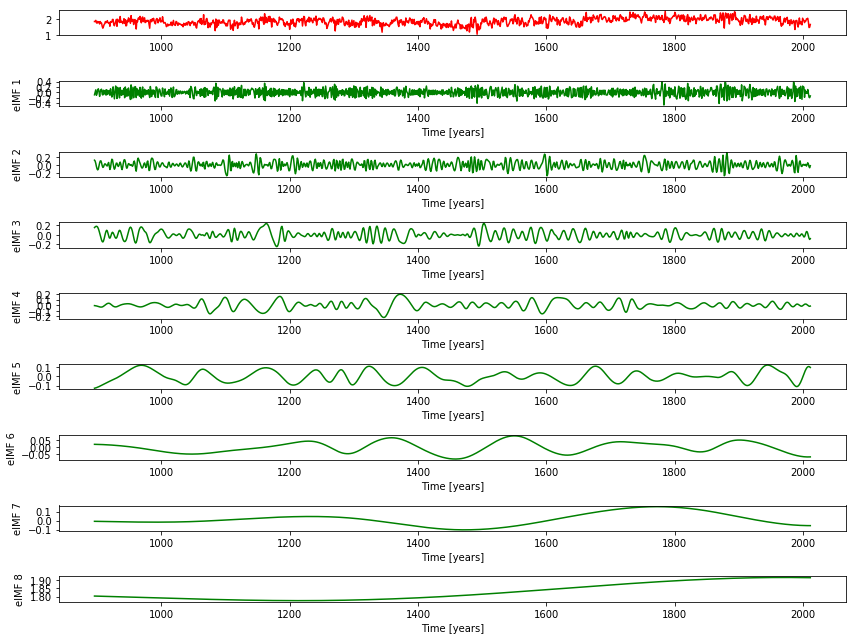

In [9]:
# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')
for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
    plt.xlabel("Time [years]")
    plt.tight_layout()

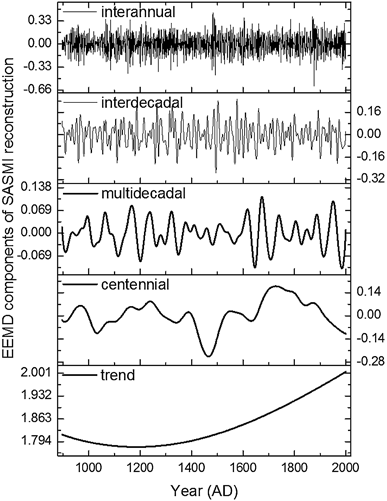

In [14]:
ismr_shi_ann_eemd = eIMFs[0]

In [15]:
ismr_shi_2017_anom_yy = np.zeros((ismr_shi_ann_eemd.shape[0],2))
ismr_shi_2017_anom_yy[:,0] = yy_shi_ann[:]
ismr_shi_2017_anom_yy[:,1] = ismr_shi_ann_eemd[:]
np.savetxt('ismr_shi_2017_anom_yy.txt', ismr_shi_2017_anom_yy, delimiter=",")